In [17]:
# improting useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# loading the dataset
df = pd.read_csv('train.csv')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [19]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [20]:
# changing date column to datetime type and setting it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [21]:
# sorting the dataframe by store, item, and then by date
df = df.sort_values(["store", "item", "date"])
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [22]:
# studying a single store and a single item
df_si = df[(df["store"] == 1) & (df["item"] == 1)].copy()
df_si

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,1,1,14
2017-12-28,1,1,19
2017-12-29,1,1,15


In [23]:
type(df_si.index) # to verify the index type

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
# checking if there are any missing dates
start_date = df_si.index.min()
end_date = df_si.index.max()

full_date_range = pd.date_range(
    start=start_date,
    end=end_date,
    freq="D"
)
missing_dates = full_date_range.difference(df_si.index)
len(missing_dates)

0

In [25]:
df_si = df_si.drop(columns=["store", "item"]) # dropped because they are constant

In [26]:
df_si.isnull().sum() # checking for null values

sales    0
dtype: int64

In [27]:
df_si["sales"].describe()

count    1826.000000
mean       19.971522
std         6.741022
min         4.000000
25%        15.000000
50%        19.000000
75%        24.000000
max        50.000000
Name: sales, dtype: float64

<Axes: xlabel='date'>

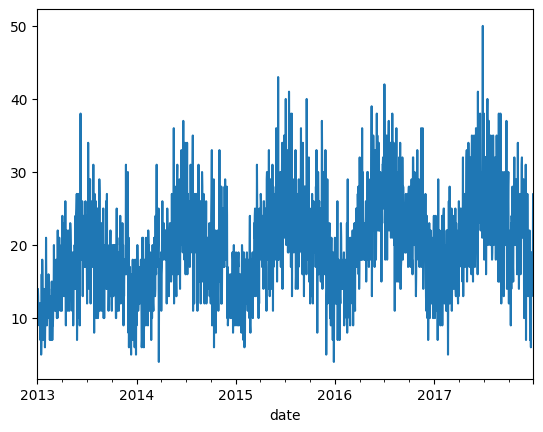

In [28]:
df_si["sales"].plot() # this plot is noisy

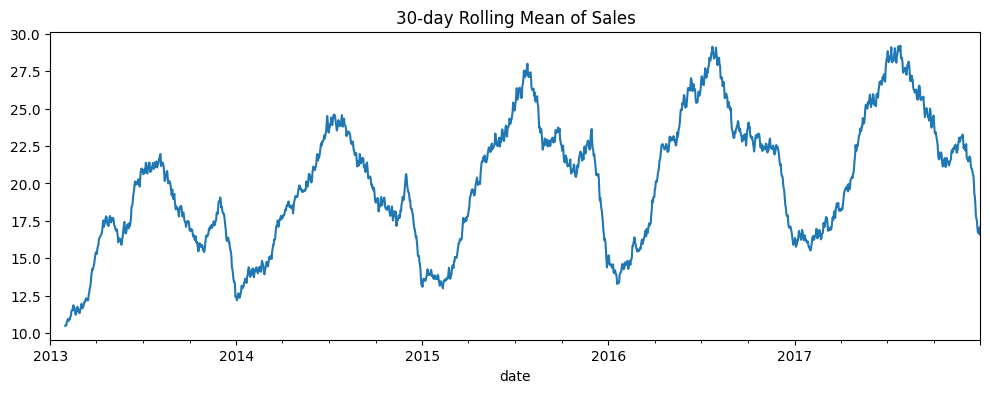

In [29]:
df_si["sales"].rolling(30).mean().plot(figsize=(12,4))
plt.title("30-day Rolling Mean of Sales")
plt.show()

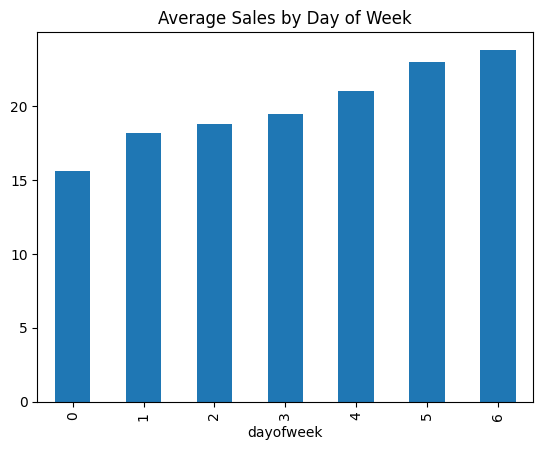

In [30]:
df_si["dayofweek"] = df_si.index.dayofweek

df_si.groupby("dayofweek")["sales"].mean().plot(kind="bar")
plt.title("Average Sales by Day of Week")
plt.show()

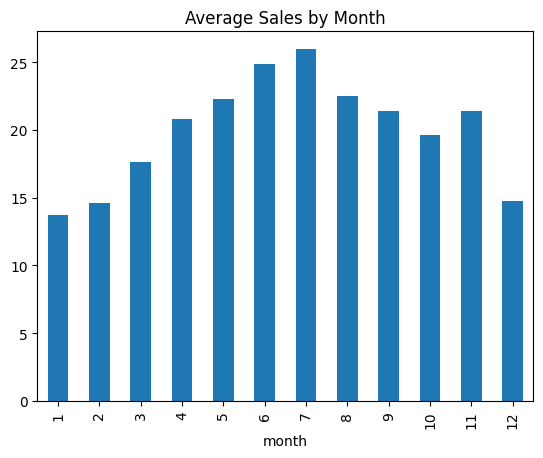

In [31]:
df_si["month"] = df_si.index.month

df_si.groupby("month")["sales"].mean().plot(kind="bar")
plt.title("Average Sales by Month")
plt.show()

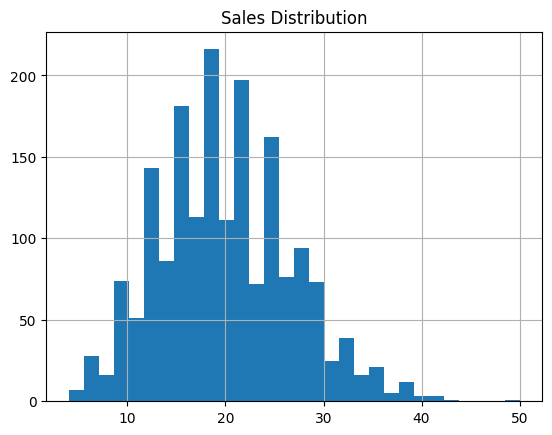

In [32]:
df_si["sales"].hist(bins=30)
plt.title("Sales Distribution")
plt.show()